7333
Generator(
  (main): Sequential(
    (0): ConvTranspose1d(100, 512, kernel_size=(4,), stride=(4,), bias=False)
    (1): ReLU(inplace=True)
    (2): ConvTranspose1d(512, 256, kernel_size=(16,), stride=(16,), bias=False)
    (3): ReLU(inplace=True)
    (4): ConvTranspose1d(256, 128, kernel_size=(16,), stride=(16,), bias=False)
    (5): ReLU(inplace=True)
    (6): ConvTranspose1d(128, 64, kernel_size=(16,), stride=(16,), bias=False)
    (7): ReLU(inplace=True)
    (8): ConvTranspose1d(64, 1, kernel_size=(16,), stride=(16,), bias=False)
    (9): Tanh()
  )
)
Discriminator(
  (relu): LeakyReLU(negative_slope=0.2, inplace=True)
  (conv1): Conv1d(1, 64, kernel_size=(16,), stride=(16,), bias=False)
  (conv2): Conv1d(64, 128, kernel_size=(16,), stride=(16,), bias=False)
  (conv3): Conv1d(128, 256, kernel_size=(16,), stride=(16,), bias=False)
  (conv4): Conv1d(256, 512, kernel_size=(16,), stride=(16,), bias=False)
  (conv5): Conv1d(512, 1, kernel_size=(4,), stride=(4,), bias=False)
  (sigmo

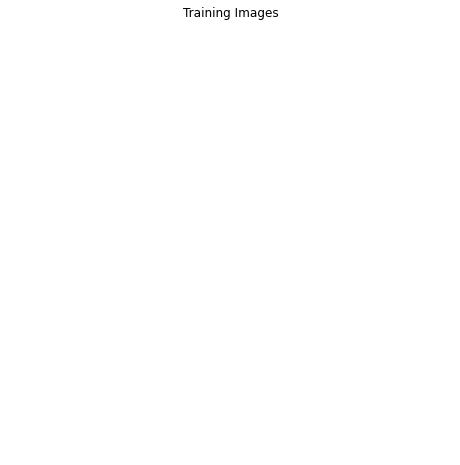

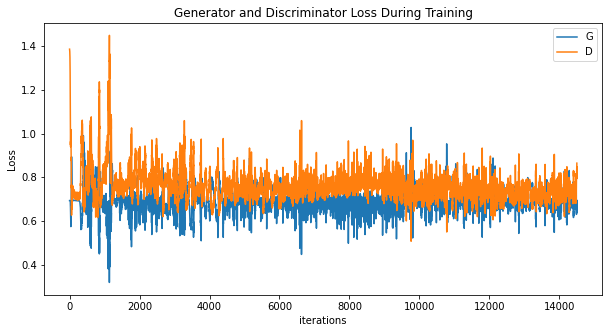

In [1]:
import glob
import numpy as np
from PIL import Image
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
# Batch size during training

batch_size = 128
# Spatial size of training images. All images will be resized to this
#   size using a transformer.

image_size = 512
# Number of channels in the training images. For color images this is 3

nc = 1
# Size of z latent vector (i.e. size of generator input)

nz = 100
# Size of feature maps in generator

ngf = 64
# Size of feature maps in discriminator

ndf = 64
# Number of training epochs

num_epochs = 250
# Learning rate for optimizers

lr = 5e-5
# Beta1 hyperparam for Adam optimizers

beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.

ngpu = 1
workers = 2
'''
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(100, 512, kernel_size=(4,4), stride=(2,2), padding=(1,1), bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(512, 256, kernel_size=(4,4), stride=(4,4), padding=(1,1), bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(256, 128, kernel_size=(4,4), stride=(4,4), padding=(1,1), bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(128, 64, kernel_size=(4,4), stride=(4,4), padding=(1,1), bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( 64, 1, kernel_size=(4,4), stride=(4,4), padding=(1,1), bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )
    def forward(self, input):
        return self.main(input)
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(1, 64, kernel_size=(4,4), stride=(4, 4), padding=(1, 1), bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(64, 128, kernel_size=(4,4), stride=(4, 4), padding=(1, 1), bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(128, 256, kernel_size=(4,4), stride=(4, 4), padding=(1, 1), bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(256, 512, kernel_size=(4,4), stride=(4, 4), padding=(1, 1), bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(512, 1, kernel_size=(2,2), stride=(1, 1), padding=(0, 0), bias=False),
            nn.Sigmoid()
        )
    def forward(self, input):
        return self.main(input)'''

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose1d(100, 512, kernel_size=4, stride=4, padding=0, bias=False),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose1d(512, 256, kernel_size=16, stride=16, padding=0, bias=False),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose1d(256, 128, kernel_size=16, stride=16, padding=0, bias=False),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose1d(128, 64, kernel_size=16, stride=16, padding=0, bias=False),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose1d( 64, 1, kernel_size=16, stride=16, padding=0, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )
    def forward(self, input):
        return self.main(input)

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.relu = nn.LeakyReLU(0.2, inplace=True)
        #nn.Flatten(),
        # input is (nc) x 64 x 64
        self.conv1 = nn.Conv1d(1, 64, kernel_size=16, stride=16, padding=0, bias=False)
        # state size. (ndf) x 32 x 32
        self.conv2 = nn.Conv1d(64, 128, kernel_size=16, stride=16, padding=0, bias=False)
        # state size. (ndf*2) x 16 x 16
        self.conv3 = nn.Conv1d(128, 256, kernel_size=16, stride=16, padding=0, bias=False)
        # state size. (ndf*4) x 8 x 8
        self.conv4 = nn.Conv1d(256, 512, kernel_size=16, stride=16, padding=0, bias=False)
        # state size. (ndf*8) x 4 x 4
        self.conv5 = nn.Conv1d(512, 1, kernel_size=4, stride=4, padding=0, bias=False)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        #print("Asdf")
        #print(x.shape)
        x = self.relu(self.conv1(x))
        #print("Asdf")
        #print(x.shape)
        x = self.relu(self.conv2(x))
        #print("Asdf")
        #print(x.shape)
        x = self.relu(self.conv3(x))
        #print("Asdf")
        #print(x.shape)
        x = self.relu(self.conv4(x))
        #print("Asdf")
        #print(x.shape)
        x = self.sigmoid(self.conv5(x))
        #print("Asdf")
        #print(x.shape)
        return x

dirs = glob.iglob("img/*/*.png")
print(len(list(dirs)))
dataset = datasets.ImageFolder(root="img", transform=transforms.Compose([transforms.ToTensor(),
                                                        transforms.Grayscale(num_output_channels=1),
                                                        transforms.Lambda(lambda x: torch.flatten(x)),
                                                        transforms.Lambda(lambda x: x.view((1, x.shape[0])))]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)
# Decide which device we want to run on

device = torch.device("cuda:0")# if (torch.cuda.is_available() and ngpu > 0) else "cpu")
# Plot some training images

real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
#plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
#plt.show()
# custom weights initialization called on netG and netD

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
# Create the generator

netG = Generator(ngpu).to(device)
# Handle multi-gpu if desired

if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.

netG.apply(weights_init)
# Print the model

print(netG)
# Create the Discriminator

netD = Discriminator(ngpu).to(device)
# Handle multi-gpu if desired

if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.

netD.apply(weights_init)
# Print the model

print(netD)
# Initialize BCELoss function

criterion = nn.BCELoss()
# Create batch of latent vectors that we will use to visualize
#  the progression of the generator

fixed_noise = torch.randn(64, nz, 1, device=device)
# Establish convention for real and fake labels during training

real_label = 1.
fake_label = 0.
# Setup Adam optimizers for both G and D

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
# Training Loop
# Lists to keep track of progress

img_list = []
G_losses = []
D_losses = []
iters = 0
print("Starting Training Loop...")
# For each epoch

for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        #print(real_cpu.shape)
        output = netD(real_cpu).view(-1)
        #print(output.shape)
        # Calculate loss on all-real batch
        #print(data[0].size())
        ###print(output.size(), label.size())
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()
        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        #print("Gen shape")
        ###print(fake.shape)
        label.fill_(fake_label)
        #print(fake.size())
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()
        # Output training stats
        if i % 10 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
        iters += 1

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])
torch.Size([64, 1, 262144])


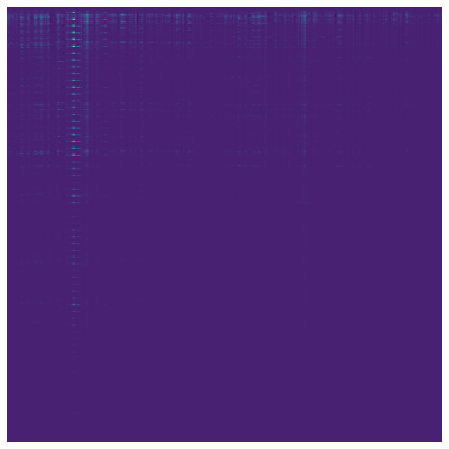

In [2]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
for i in img_list:
    print(i.shape)
ims = [[plt.imshow(i[0][0].view(512, 512), animated=True)] for i in img_list]
'''np.transpose(i,(1,2,0))'''
for i in range(len(ims)):
    plt.imsave("{}.png".format(i), img_list[i][0][0].view(512, 512), cmap="gray")
    file = open("{}.npy".format(i), 'wb')
    np.save(file, img_list[i][0][0].view(512, 512))
    file.close()

ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())
plt.show()